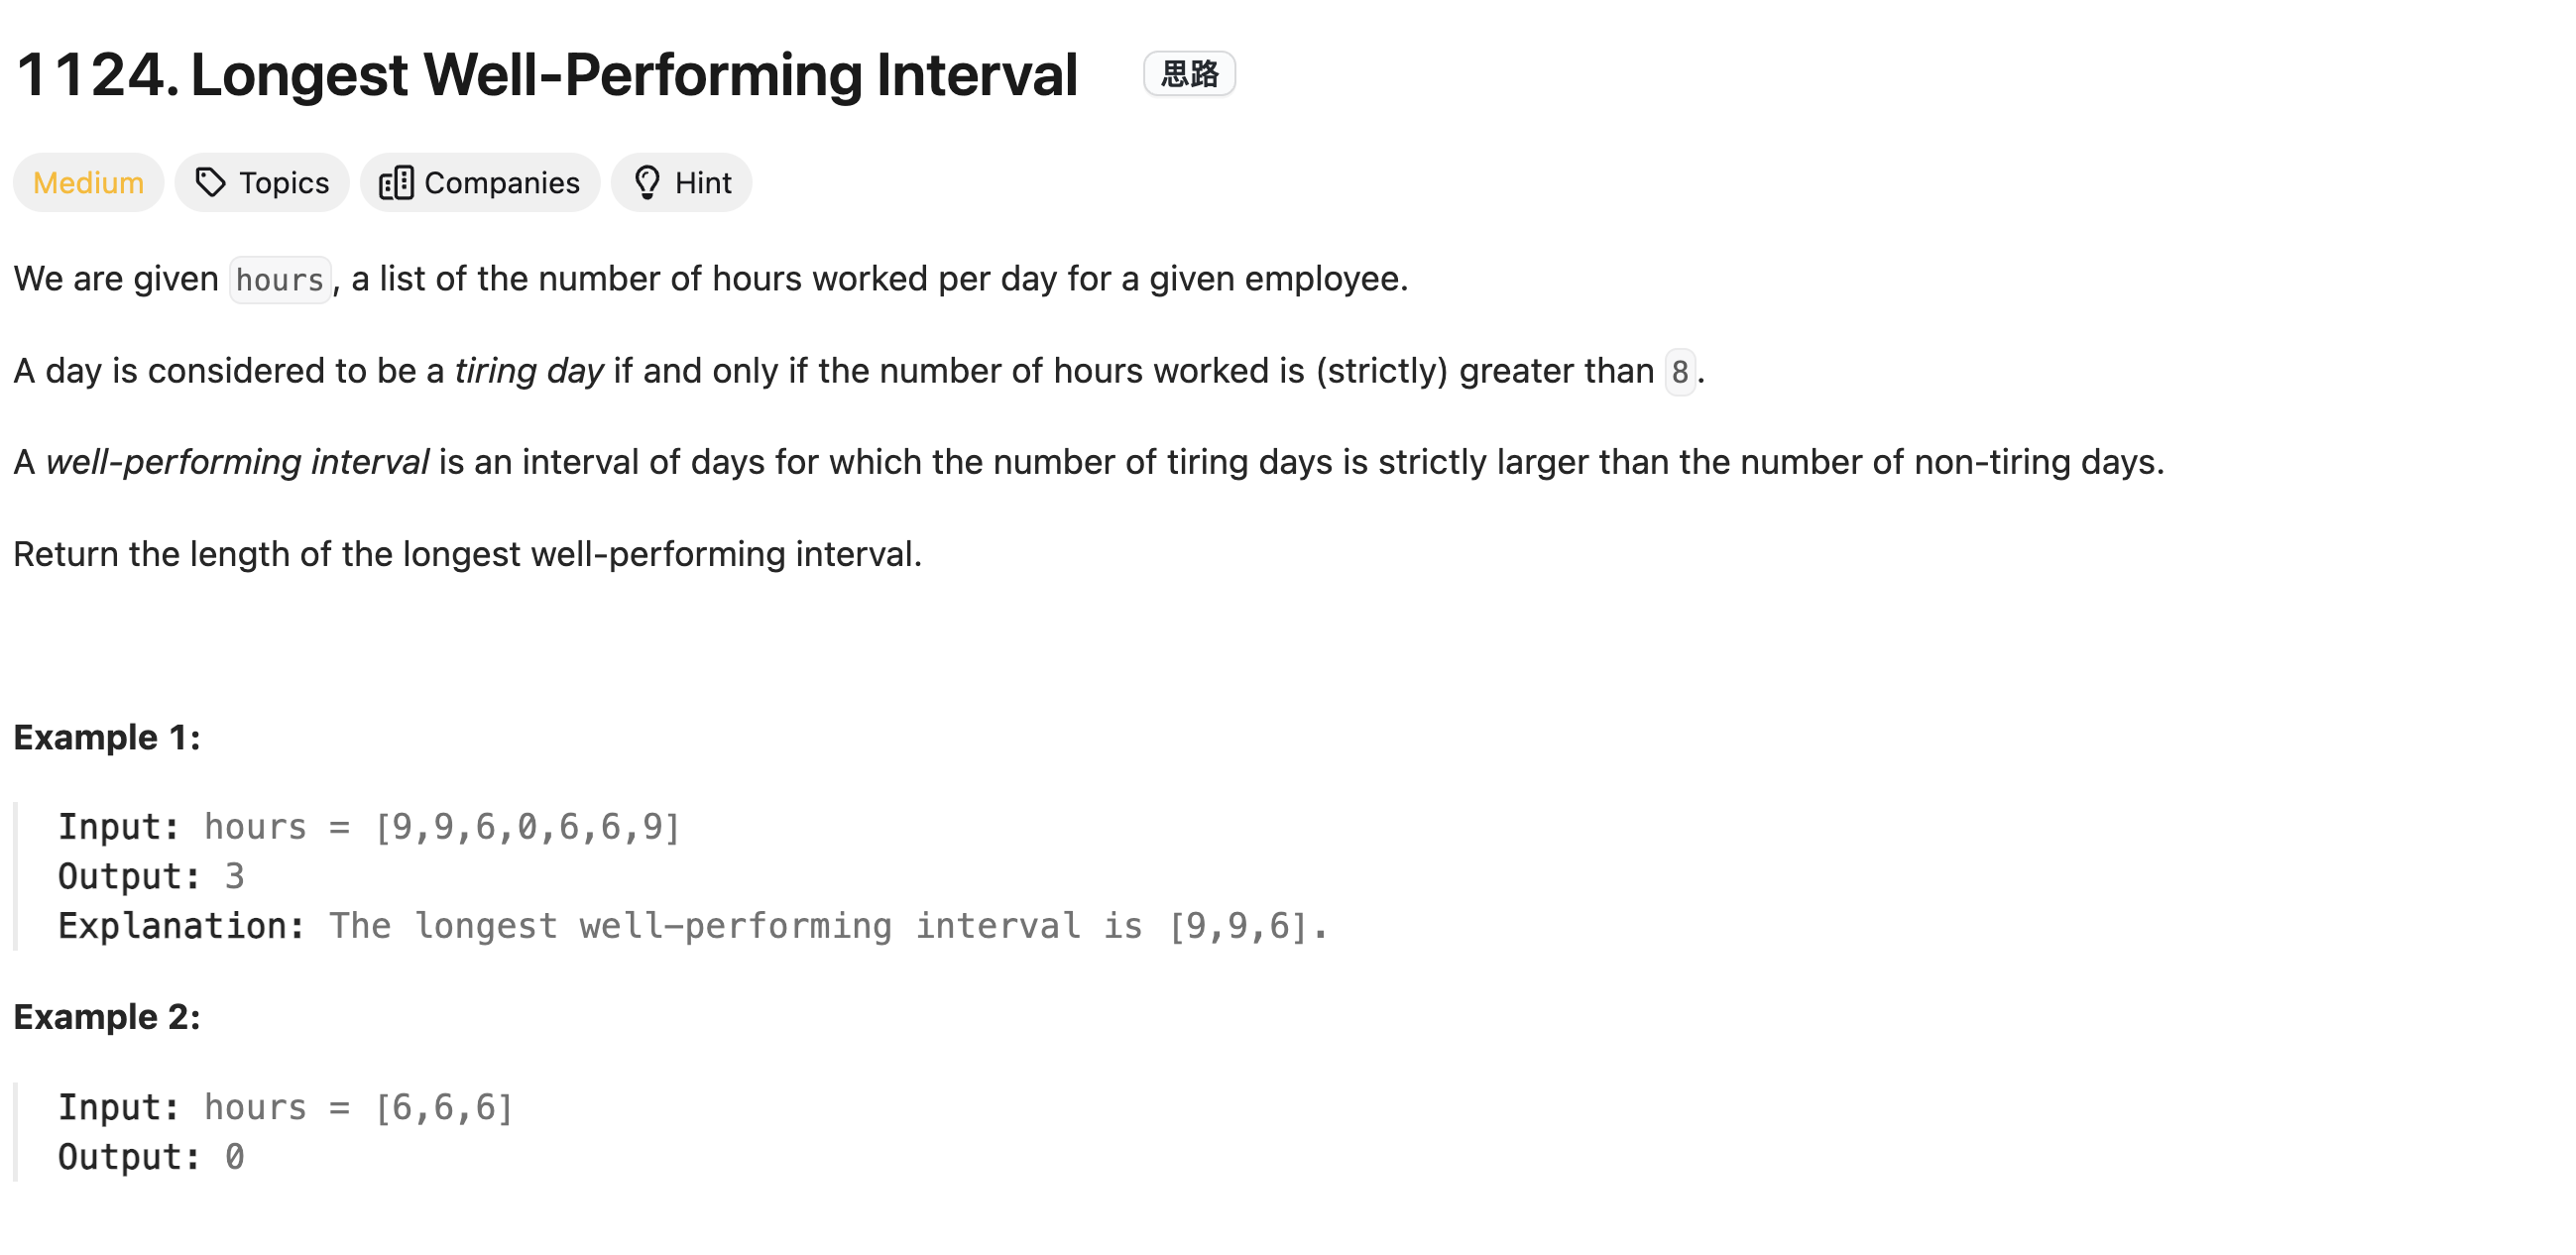

In [ ]:
class Solution:
    def longestWPI(self, hours: List[int]) -> int:
        n = len(hours)
        preSum = [0] * (n+1)

        for i in range(1, n+1):
            if hours[i-1] <= 8:
                preSum[i] = preSum[i-1]-1
            elif hours[i-1] > 8:
                preSum[i] = preSum[i-1]+1
        
        val_to_idx = {}
        maxLength = 0
        for i in range(n+1):
            if preSum[i] not in val_to_idx:
                val_to_idx[preSum[i]] = i
            if preSum[i] > 0:
                # preSum[i] 为正，说明 hours[0..i-1] 都是「表现良好的时间段」
                maxLength = max(maxLength, i)
            else:
                # preSum[i] 为负，需要寻找一个 j 使得 preSum[i] - preSum[j] > 0
                # 考虑到我们的 preSum 数组每两个相邻元素的差的绝对值都是 1 且 j 应该尽可能小，
                # 那么只要找到 preSum[j] == preSum[i] - 1，nums[j+1..i] 就是一个「表现良好的时间段」
                if preSum[i] - 1 in val_to_idx:
                    j = val_to_idx[preSum[i] - 1]
                    maxLength = max(maxLength, i-j)
        return maxLength
        